In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [106]:
df=pd.read_csv('data\\tested.csv')

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [109]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [110]:
df.shape

(418, 12)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

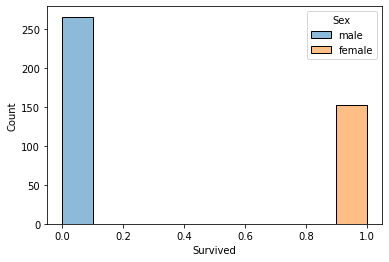

In [111]:
sns.histplot(x='Survived',data=df,hue='Sex')

In [112]:
df_sex=pd.DataFrame(df.groupby('Sex')['Survived'].sum())

In [113]:
df_sex

,Survived
Sex,
female,152
male,0


No male passenger was survived


In [114]:
df.isnull().sum() #checking null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [115]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [116]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [117]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

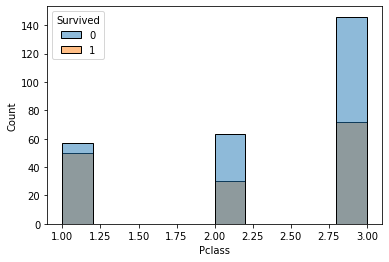

In [118]:
sns.histplot(x='Pclass',data=df,hue='Survived')

In [119]:
df_class=pd.DataFrame(df.groupby('Pclass')['Survived'].sum())

In [120]:
df_class

,Survived
Pclass,
1,50
2,30
3,72


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

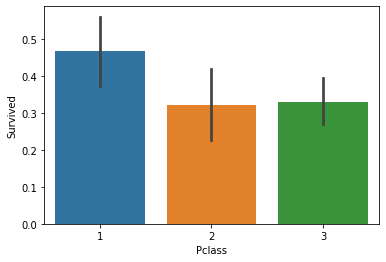

In [121]:
sns.barplot(data=df,x='Pclass',y='Survived')

In [122]:
df_age=pd.DataFrame(df.groupby('Age')['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

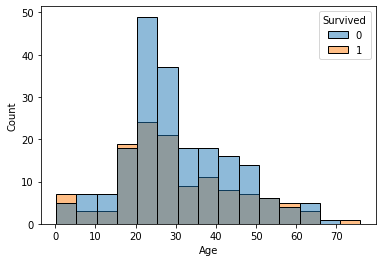

In [123]:
sns.histplot(x='Age',data=df,hue='Survived')

In [124]:
df.drop('Name',axis=1,inplace=True)

In [125]:
df['Age'].mode()[0]

21.0

In [126]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [127]:
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.4 KB


In [103]:
df.dropna(inplace=True)

In [130]:
df.shape

(418, 11)

In [133]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

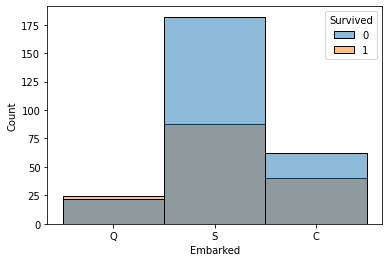

In [140]:
sns.histplot(x='Embarked',data=df,hue='Survived')

In [152]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,0.021962,0.099943,0.159120,0.191514,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.503026,0.001087,0.018721,-0.577147,0.227983
Sex,-1.000000,0.108615,1.000000,-0.021962,-0.099943,-0.159120,-0.191514,0.076281
Age,0.021962,-0.503026,-0.021962,1.000000,-0.054656,-0.040213,0.369473,-0.126648
SibSp,0.099943,0.001087,-0.099943,-0.054656,1.000000,0.306895,0.171539,0.052708
Parch,0.159120,0.018721,-0.159120,-0.040213,0.306895,1.000000,0.230046,0.054577
Fare,0.191514,-0.577147,-0.191514,0.369473,0.171539,0.230046,1.000000,-0.257183
Embarked,-0.076281,0.227983,0.076281,-0.126648,0.052708,0.054577,-0.257183,1.000000


In [142]:
df.drop('PassengerId',axis=1,inplace=True)

In [146]:
df.drop('Ticket',axis=1,inplace=True)

In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [148]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [151]:
df['Sex']=le.fit_transform(df['Sex'])

In [175]:
df['Age']=df['Age'].astype(int)

In [179]:
df.dropna(subset=['Fare'],inplace=True)

In [180]:
df['Fare']=df['Fare'].astype(int)

In [184]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [185]:
df.round()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7,1
1,1,3,0,47,1,0,7,2
2,0,2,1,62,0,0,9,1
3,0,3,1,27,0,0,8,2
4,1,3,0,22,1,1,12,2
...,...,...,...,...,...,...,...,...
413,0,3,1,21,0,0,8,2
414,1,1,0,39,0,0,108,0
415,0,3,1,38,0,0,7,2
416,0,3,1,21,0,0,8,2


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [188]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [189]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [190]:
y_pred=clf.predict(X_test)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        48

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [193]:
param={
    'criterion':['gini','entropy'],
    'max_depth':[10,15,20],
    'min_samples_split':[2,3,4]
    
}

In [194]:
from sklearn.model_selection import GridSearchCV
clf1 = GridSearchCV(clf, param)

In [195]:
clf1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 3, 4]})

In [201]:
clf1.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [204]:
y2_pred=clf1.predict(X_test)

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        48

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
lr=LogisticRegression()

In [208]:
lr.fit(X_train,y_train)

c:\Users\NIDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [227]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7,1
1,3,0,47,1,0,7,2
2,2,1,62,0,0,9,1
3,3,1,27,0,0,8,2
4,3,0,22,1,1,12,2


In [239]:
new={
    'Pclass':[3],
    'Sex':[1],
    'Age':[35],
    'SibSp':[3],
    'Parch':[1],
    'Fare':[10],
    'Embarked':[2]
}

In [240]:
new_df=pd.DataFrame(new)

In [241]:
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,35,3,1,10,2


In [248]:
y_pred1=lr.predict(X_test)

In [249]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        48

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [211]:
param_grid={
    'penalty':('l1', 'l2', 'elasticnet'),
    
    'max_iter':[100,150,200]
    
}

In [222]:
lr1=GridSearchCV(lr,param_grid,cv=5)

In [224]:
lr1.fit(X_train,y_train)

c:\Users\NIDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\NIDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200],
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [225]:
lr1.best_params_

{'max_iter': 100, 'penalty': 'l2'}